In [1]:
from sklearn.decomposition import PCA # PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#file_path_Benign1 = "Updated data/BENIGN-1.csv"
#Benign1_data = pd.read_csv(file_path_Benign1)
file_path_Benign = "Updated data/BENIGN.csv"
Benign_data = pd.read_csv(file_path_Benign)
total_data = pd.read_csv(file_path_Benign)
"""
file_path_Benign2 = "Updated data/BENIGN-2.csv"
Benign2_data = pd.read_csv(file_path_Benign2)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign2)]) 

file_path_Benign3 = "Updated data/Benign_3.csv"
Benign3_data = pd.read_csv(file_path_Benign3)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign3)])

file_path_Benign4 = "Updated data/Benign_4.csv"
Benign4_data = pd.read_csv(file_path_Benign4)
total_data = pd.concat([total_data, pd.read_csv(file_path_Benign4)])
"""
file_path_Botnet = "Updated data/BotnetARES.csv"
Botnet_data = pd.read_csv(file_path_Botnet)
total_data = pd.concat([total_data, pd.read_csv(file_path_Botnet)])

file_path_Brute = "Updated data/BruteForce.csv"
Brute_data = pd.read_csv(file_path_Brute)
total_data = pd.concat([total_data, pd.read_csv(file_path_Brute)])

file_path_Dos = "Updated data/Dos.csv"
Dos_data = pd.read_csv(file_path_Dos)
total_data = pd.concat([total_data, pd.read_csv(file_path_Dos)])

file_path_Infiltration = "Updated data/Infiltration.csv"
Infil_data = pd.read_csv(file_path_Infiltration)
total_data = pd.concat([total_data, pd.read_csv(file_path_Infiltration)])

file_path_Web = "Updated data/WebAttack.csv"
Web_data = pd.read_csv(file_path_Web)
total_data = pd.concat([total_data, pd.read_csv(file_path_Web)])

file_path_Port = "Updated data/PortScan.csv"
Port_data = pd.read_csv(file_path_Port)
total_data = pd.concat([total_data, pd.read_csv(file_path_Port)])

total_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53.0,120325.0,2.0,2.0,68.0,278.0,34.0,34.0,34.0,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,53.0,137.0,2.0,2.0,58.0,90.0,29.0,29.0,29.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,80.0,81510.0,3.0,4.0,429.0,2267.0,429.0,0.0,143.0,247.683266,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,53.0,60942.0,2.0,2.0,56.0,476.0,28.0,28.0,28.0,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,53.0,31092.0,1.0,1.0,50.0,78.0,50.0,50.0,50.0,0.000000,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
print("total_data", total_data.shape)
print("Benign_data", Benign_data.shape)
#print("Benign1_data", Benign1_data.shape)
#print("Benign2_data", Benign2_data.shape)
#print("Benign3_data", Benign3_data.shape)
#print("Benign4_data", Benign3_data.shape)
print("Botnet_data", Botnet_data.shape)
print("Brute_data", Brute_data.shape)
print("Dos_data", Dos_data.shape)
print("Infil_data", Infil_data.shape)
print("Web_data", Web_data.shape)
print("Port_data", Port_data.shape)

total_data (504160, 79)
Benign_data (419012, 79)
Botnet_data (389, 79)
Brute_data (1830, 79)
Dos_data (64354, 79)
Infil_data (7, 79)
Web_data (429, 79)
Port_data (18139, 79)


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504160 entries, 0 to 18138
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             504160 non-null  float64
 1    Flow Duration                504160 non-null  float64
 2    Total Fwd Packets            504160 non-null  float64
 3    Total Backward Packets       504160 non-null  float64
 4   Total Length of Fwd Packets   504160 non-null  float64
 5    Total Length of Bwd Packets  504160 non-null  float64
 6    Fwd Packet Length Max        504160 non-null  float64
 7    Fwd Packet Length Min        504160 non-null  float64
 8    Fwd Packet Length Mean       504160 non-null  float64
 9    Fwd Packet Length Std        504160 non-null  float64
 10  Bwd Packet Length Max         504160 non-null  float64
 11   Bwd Packet Length Min        504160 non-null  float64
 12   Bwd Packet Length Mean       504160 non-null

In [7]:
total_data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,504160.000000,5.041600e+05,504160.000000,504160.000000,5.041600e+05,5.041600e+05,504160.000000,504160.000000,504160.000000,504160.000000,...,504160.000000,5.041600e+05,5.041600e+05,5.041600e+05,5.041600e+05,5.041600e+05,5.041600e+05,5.041600e+05,5.041600e+05,5.041600e+05
mean,8679.658668,1.656422e+07,9.892711,11.113569,6.039732e+02,1.671380e+04,231.154340,19.267647,63.631335,77.315660,...,6.130312,-1.870919e+03,9.148156e+04,4.589787e+04,1.714326e+05,6.559834e+04,9.286662e+06,5.669961e+05,9.713038e+06,8.840601e+06
std,18998.635882,3.521517e+07,812.981470,1087.574847,6.944595e+03,2.388747e+06,756.150483,61.305607,196.140167,296.983670,...,723.738074,8.009296e+05,6.772511e+05,4.182861e+05,1.080083e+06,6.037724e+05,2.475837e+07,4.891088e+06,2.553599e+07,2.448715e+07
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.080000e+02,2.000000,1.000000,1.200000e+01,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,5.059500e+04,2.000000,2.000000,6.600000e+01,1.560000e+02,40.000000,2.000000,36.500000,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,5.319407e+06,6.000000,5.000000,3.330000e+02,9.892500e+02,203.000000,37.000000,52.000000,74.247607,...,3.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65534.000000,1.199999e+08,214125.000000,284602.000000,2.321478e+06,6.296006e+08,24820.000000,2065.000000,5939.285714,5797.500000,...,204290.000000,1.380000e+02,1.016597e+08,7.050000e+07,1.020000e+08,1.016597e+08,1.200000e+08,7.514502e+07,1.200000e+08,1.200000e+08


# PCA

## Total Data

In [6]:
# Drop "Label" column from the complete data
(total_data.iloc[:,:-1]).head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443.0,82708.0,10.0,5.0,598.0,1247.0,357.0,0.0,59.8,113.982260,...,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,455017.0,5.0,2.0,323.0,503.0,323.0,0.0,64.6,144.449991,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,146661.0,1.0,1.0,101.0,133.0,101.0,101.0,101.0,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,27535107.0,2.0,2.0,94.0,199.0,50.0,44.0,47.0,4.242641,...,1.0,20.0,24405.0,0.0,24405.0,24405.0,27419279.0,0.0,27419279.0,27419279.0
4,57643.0,3.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.920310,...,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Keep 99% information of the data
pca = PCA(n_components = 0.99)
data_pca = pca.fit_transform(total_data.iloc[:,:-1])
data_pca.shape

(2026516, 7)

In [8]:
principalDf = pd.DataFrame(data = data_pca, columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7'])
principalDf = principalDf.reset_index(drop = True)
total_data = total_data.reset_index(drop = True)
principalDf = pd.concat([principalDf, total_data.iloc[:,-1]], axis = 1)
principalDf.head()

,c1,c2,c3,c4,c5,c6,c7,Label
0,-3.436686e+07,-53430.244563,-2.876823e+06,-1.722757e+06,1.088391e+06,-6.749728e+05,-3.451043e+05,BENIGN
1,-3.377550e+07,-53048.753455,-2.669009e+06,-1.735201e+06,1.198750e+06,-4.901909e+05,-1.792650e+05,BENIGN
2,-3.436396e+07,-52992.941201,-2.946047e+06,-1.744706e+06,1.066794e+06,-6.261457e+05,-3.031138e+05,BENIGN
3,5.212929e+07,-66257.913482,-9.168560e+06,-8.412126e+05,4.496938e+07,2.505122e+07,-2.293622e+06,BENIGN
4,-3.457710e+07,-54321.242083,-3.075636e+06,8.587885e+06,1.049895e+06,-6.639051e+05,-3.586894e+05,BENIGN


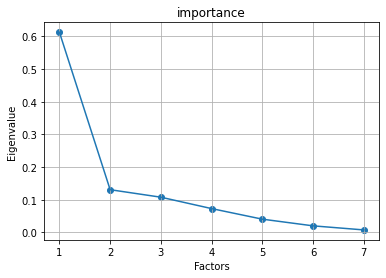

Numbers of components: 7
PCA components shape: (7, 78)


In [9]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1, len(importance)+1),importance)
plt.plot(range(1, len(importance)+1),importance)
plt.title('importance')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

print("Numbers of components: {}".format(pca.n_components_))
print("PCA components shape:", (pca.components_).shape)

In [10]:
explained_variance_need = np.array([pca.explained_variance_])
component_need = np.array(pca.components_)
print("explained_variance_need shape: ", explained_variance_need.shape)
print("component_need shape: ", component_need.shape)
column_names = list(total_data)
weights = np.divide(np.dot(explained_variance_need, component_need), np.sum(component_need, axis = 0), out = np.zeros_like(np.dot(explained_variance_need, component_need)), where=np.sum(component_need, axis = 0)!=0)
weights = weights/np.sum(weights)
df_weights = pd.DataFrame({"columns": column_names[:-1], "weights": weights[0].tolist()})
df_weights.sort_values(by="weights", ascending=False)

explained_variance_need shape:  (1, 7)
component_need shape:  (7, 78)


,columns,weights
65,Subflow Bwd Bytes,0.275918
5,Total Length of Bwd Packets,0.275142
76,Idle Max,0.149116
64,Subflow Bwd Packets,0.110943
3,Total Backward Packets,0.110943
...,...,...
74,Idle Mean,-0.035357
73,Active Min,-0.058469
27,Bwd IAT Std,-0.066711
11,Bwd Packet Length Min,-0.106979


## Benign

In [8]:
pca_benign = PCA(n_components = 4)
benign_pca = pca_benign.fit_transform(Benign_data.iloc[:,:-1])
print("benign_pca shape: ", benign_pca.shape)

benign_pca shape:  (419012, 4)


In [9]:
Benign_pcaDf = pd.DataFrame(data = benign_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Benign_pcaDf = Benign_pcaDf.reset_index(drop = True)
Benign_data = Benign_data.reset_index(drop = True)
Benign_pcaDf = pd.concat([Benign_pcaDf, Benign_data.iloc[:,-1]], axis = 1)
Benign_pcaDf.to_csv("Benign.csv", index=False)
Benign_pcaDf.head()

,c1,c2,c3,c4,Label
0,-2.302282e+07,-2.065777e+06,786569.638832,-184215.787131,BENIGN
1,-2.313022e+07,-9.896724e+05,765329.801296,-190742.827812,BENIGN
2,-2.299124e+07,-2.034616e+06,768827.968199,-196814.894909,BENIGN
3,-2.306801e+07,-2.060538e+06,778997.162605,-187526.864714,BENIGN
4,-2.309112e+07,-2.065492e+06,774511.425229,-191619.344242,BENIGN


In [10]:
explained_variance_benign = np.array([pca_benign.explained_variance_])
component_benign = np.array(pca_benign.components_)
print("explained_variance shape: ", explained_variance_benign.shape)
print("component shape: ", component_benign.shape)
a, b = np.dot(explained_variance_benign, component_benign), np.sum(component_benign, axis = 0)
benign_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign_weights = benign_weights/np.sum(benign_weights)
column_names = list(total_data)
df_weights_benign = pd.DataFrame({"columns": column_names[:-1], "weights": benign_weights[0].tolist()})
df_weights_benign.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
46,PSH Flag Count,0.206575
25,Bwd IAT Total,0.192672
20,Fwd IAT Total,0.137619
1,Flow Duration,0.127278
72,Active Max,0.068964
...,...,...
29,Bwd IAT Min,-0.036614
71,Active Std,-0.081042
21,Fwd IAT Mean,-0.108284
16,Flow IAT Mean,-0.114345


## Benign1

In [11]:
pca_benign1 = PCA(n_components = 4)
benign1_pca = pca_benign1.fit_transform(Benign1_data.iloc[:,:-1])
print("benign1_pca shape: ", benign1_pca.shape)

benign1_pca shape:  (1000000, 4)


In [12]:
Benign1_pcaDf = pd.DataFrame(data = benign1_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Benign1_pcaDf = Benign1_pcaDf.reset_index(drop = True)
Benign1_data = Benign1_data.reset_index(drop = True)
Benign1_pcaDf = pd.concat([Benign1_pcaDf, Benign1_data.iloc[:,-1]], axis = 1)
Benign1_pcaDf.to_csv("Benign1.csv", index=False)
Benign1_pcaDf.head()

,c1,c2,c3,c4,Label
0,-2.301229e+07,-84597.470515,-1.976253e+06,8.251911e+05,BENIGN
1,-2.237273e+07,-84100.345209,-1.987503e+06,8.841768e+05,BENIGN
2,-2.303160e+07,-84150.729608,-1.997145e+06,8.739765e+05,BENIGN
3,6.022541e+07,-50738.548951,-3.922769e+05,5.273560e+07,BENIGN
4,-2.328705e+07,-85204.102123,8.334610e+06,7.763015e+05,BENIGN


In [13]:
explained_variance_benign1 = np.array([pca_benign1.explained_variance_])
component_benign1 = np.array(pca_benign1.components_)
print("explained_variance shape: ", explained_variance_benign1.shape)
print("component shape: ", component_benign1.shape)
a, b = np.dot(explained_variance_benign1, component_benign1), np.sum(component_benign1, axis = 0)
benign1_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign1_weights = benign1_weights/np.sum(benign1_weights)
column_names = list(total_data)
df_weights_benign1 = pd.DataFrame({"columns": column_names[:-1], "weights": benign1_weights[0].tolist()})
df_weights_benign1.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
48,URG Flag Count,1.245962
11,Bwd Packet Length Min,0.050718
72,Active Max,0.022056
54,Avg Bwd Segment Size,0.014291
12,Bwd Packet Length Mean,0.014291
...,...,...
20,Fwd IAT Total,-0.023810
39,Max Packet Length,-0.024343
25,Bwd IAT Total,-0.025355
63,Subflow Fwd Bytes,-0.042536


## Benign2

In [14]:
pca_benign2 = PCA(n_components = 4)
benign2_pca = pca_benign2.fit_transform(Benign2_data.iloc[:,:-1])
print("benign2_pca shape: ", benign2_pca.shape)

benign2_pca shape:  (676045, 4)


In [15]:
Benign2_pcaDf = pd.DataFrame(data = benign2_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Benign2_pcaDf = Benign2_pcaDf.reset_index(drop = True)
Benign2_data = Benign2_data.reset_index(drop = True)
Benign2_pcaDf = pd.concat([Benign2_pcaDf, Benign2_data.iloc[:,-1]], axis = 1)
Benign2_pcaDf.to_csv("Benign2.csv", index=False)
Benign2_pcaDf.head()

,c1,c2,c3,c4,Label
0,-2.309804e+07,-1.922877e+06,8.600601e+05,-27635.305115,BENIGN
1,1.273097e+08,1.430398e+06,9.495616e+07,-136136.449853,BENIGN
2,-2.312362e+07,-1.926138e+06,8.549622e+05,-27660.738047,BENIGN
3,-2.159782e+07,-1.910162e+06,1.055269e+06,-23928.944560,BENIGN
4,2.239695e+08,1.429954e+06,5.944914e+06,-114244.779325,BENIGN


In [16]:
explained_variance_benign2 = np.array([pca_benign2.explained_variance_])
component_benign2 = np.array(pca_benign2.components_)
print("explained_variance shape: ", explained_variance_benign2.shape)
print("component shape: ", component_benign2.shape)
a, b = np.dot(explained_variance_benign2, component_benign2), np.sum(component_benign2, axis = 0)
benign2_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
benign2_weights = benign2_weights/np.sum(benign2_weights)
df_weights_benign2 = pd.DataFrame({"columns": column_names[:-1], "weights": benign2_weights[0].tolist()})
df_weights_benign2.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
48,URG Flag Count,1.101782
11,Bwd Packet Length Min,0.027016
72,Active Max,0.011388
54,Avg Bwd Segment Size,0.006076
12,Bwd Packet Length Mean,0.006076
...,...,...
20,Fwd IAT Total,-0.010512
39,Max Packet Length,-0.010835
25,Bwd IAT Total,-0.011466
63,Subflow Fwd Bytes,-0.019955


## Botnet

In [11]:
pca_Botnet = PCA(n_components = 4)
Botnet_pca = pca_Botnet.fit_transform(Botnet_data.iloc[:,:-1])
print("Botnet_pca shape: ", Botnet_pca.shape)

Botnet_pca shape:  (389, 4)


In [12]:
Botnet_pcaDf = pd.DataFrame(data = Botnet_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Botnet_pcaDf = Botnet_pcaDf.reset_index(drop = True)
Botnet_data = Botnet_data.reset_index(drop = True)
Botnet_pcaDf = pd.concat([Botnet_pcaDf, Botnet_data.iloc[:,-1]], axis = 1)
Botnet_pcaDf.to_csv("BotnetARES.csv", index=False)
Botnet_pcaDf.head()

,c1,c2,c3,c4,Label
0,-470000.294065,-1.387019e+06,880491.353876,-2373.550150,BotnetARES
1,-258184.320376,4.706171e+05,-490717.236403,-61172.401022,BotnetARES
2,-467353.783587,-1.360818e+06,856857.832457,-18947.191820,BotnetARES
3,-299942.980612,1.996492e+05,-574157.274728,32075.051080,BotnetARES
4,-304091.880120,1.598055e+05,-540303.708697,66013.720585,BotnetARES


In [13]:
explained_variance_Botnet = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
20,Fwd IAT Total,0.092363
1,Flow Duration,0.091551
42,Packet Length Variance,0.085087
25,Bwd IAT Total,0.083739
63,Subflow Fwd Bytes,0.077362
...,...,...
67,Init_Win_bytes_backward,-0.003458
23,Fwd IAT Max,-0.008820
18,Flow IAT Max,-0.009085
28,Bwd IAT Max,-0.009101


## Brute

In [14]:
pca_Brute = PCA(n_components = 4)
Brute_pca = pca_Brute.fit_transform(Brute_data.iloc[:,:-1])
print("Brute_pca shape: ", Brute_pca.shape)

Brute_pca shape:  (1830, 4)


In [15]:
Brute_pcaDf = pd.DataFrame(data = Brute_pca, columns = ['c1', 'c2', 'c3','c4'])
Brute_pcaDf = Brute_pcaDf.reset_index(drop = True)
Brute_data = Brute_data.reset_index(drop = True)
Brute_pcaDf = pd.concat([Brute_pcaDf, Brute_data.iloc[:,-1]], axis = 1)
Brute_pcaDf.to_csv("BruteForce.csv", index=False)
Brute_pcaDf.head()

,c1,c2,c3,c4,Label
0,-1.300627e+07,1.953004e+06,7.164526e+05,14155.921528,BruteForce
1,6.449546e+06,-3.044122e+06,1.022950e+06,-209013.012857,BruteForce
2,9.068741e+06,-3.911537e+06,1.001082e+06,395553.663931,BruteForce
3,7.699106e+06,-3.319351e+06,9.514523e+05,28455.641568,BruteForce
4,7.423131e+06,-3.475035e+06,1.106989e+06,-169245.890622,BruteForce


In [16]:
explained_variance_Brute = np.array([pca_Botnet.explained_variance_])
component_Botnet = np.array(pca_Botnet.components_)
print("explained_variance shape: ", explained_variance_Botnet.shape)
print("component shape: ", component_Botnet.shape)
a, b = np.dot(explained_variance_Botnet, component_Botnet), np.sum(component_Botnet, axis = 0)
Botnet_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Botnet_weights = Botnet_weights/np.sum(Botnet_weights)
df_weights_Botnet = pd.DataFrame({"columns": column_names[:-1], "weights": Botnet_weights[0].tolist()})
df_weights_Botnet.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
20,Fwd IAT Total,0.092363
1,Flow Duration,0.091551
42,Packet Length Variance,0.085087
25,Bwd IAT Total,0.083739
63,Subflow Fwd Bytes,0.077362
...,...,...
67,Init_Win_bytes_backward,-0.003458
23,Fwd IAT Max,-0.008820
18,Flow IAT Max,-0.009085
28,Bwd IAT Max,-0.009101


## Dos

In [17]:
pca_Dos = PCA(n_components = 4)
Dos_pca = pca_Dos.fit_transform(Dos_data.iloc[:,:-1])
print("Dos_pca shape: ", Dos_pca.shape)

Dos_pca shape:  (64354, 4)


In [18]:
Dos_pcaDf = pd.DataFrame(data = Dos_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Dos_pcaDf = Dos_pcaDf.reset_index(drop = True)
Dos_data = Dos_data.reset_index(drop = True)
Dos_pcaDf = pd.concat([Dos_pcaDf, Dos_data.iloc[:,-1]], axis = 1)
Dos_pcaDf.to_csv("Dos.csv", index=False)
Dos_pcaDf.head()

,c1,c2,c3,c4,Label
0,1.146000e+08,8.076840e+07,-5.205145e+06,-6.266423e+06,DoS
1,1.574822e+08,9.368269e+07,-5.969465e+06,-6.025350e+06,DoS
2,1.306467e+08,-4.912120e+07,-9.134698e+06,-2.213572e+06,DoS
3,-1.279417e+08,3.923488e+06,-1.098242e+06,1.556740e+06,DoS
4,-1.279416e+08,3.923467e+06,-1.098143e+06,1.556992e+06,DoS


In [19]:
explained_variance_Dos = np.array([pca_Dos.explained_variance_])
component_Dos = np.array(pca_Dos.components_)
print("explained_variance shape: ", explained_variance_Dos.shape)
print("component shape: ", component_Dos.shape)
a, b = np.dot(explained_variance_Dos, component_Dos), np.sum(component_Dos, axis = 0)
Dos_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Dos_weights = Dos_weights/np.sum(Dos_weights)
df_weights_Dos = pd.DataFrame({"columns": column_names[:-1], "weights": Dos_weights[0].tolist()})
df_weights_Dos.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
11,Bwd Packet Length Min,0.833237
74,Idle Mean,0.543534
22,Fwd IAT Std,0.040976
77,Idle Min,0.026900
38,Min Packet Length,0.026439
...,...,...
18,Flow IAT Max,-0.026914
76,Idle Max,-0.029405
53,Avg Fwd Segment Size,-0.091350
8,Fwd Packet Length Mean,-0.091350


## Infiltration

In [20]:
pca_Infil = PCA(n_components = 4)
Infil_pca = pca_Infil.fit_transform(Infil_data.iloc[:,:-1])
print("Infil_pca shape: ", Infil_pca.shape)

Infil_pca shape:  (7, 4)


In [21]:
Infil_pcaDf = pd.DataFrame(data = Infil_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Infil_pcaDf = Infil_pcaDf.reset_index(drop = True)
Infil_data = Infil_data.reset_index(drop = True)
Infil_pcaDf = pd.concat([Infil_pcaDf, Infil_data.iloc[:,-1]], axis = 1)
Infil_pcaDf.to_csv("Infilliation.csv", index=False)
Infil_pcaDf.head()

,c1,c2,c3,c4,Label
0,-6.834457e+07,6.202407e+07,-7.611604e+06,-1.468952e+07,Infiltration
1,-2.400549e+07,-4.680000e+07,3.757384e+07,-1.837656e+07,Infiltration
2,7.329072e+06,9.221641e+06,-1.602680e+07,1.364009e+06,Infiltration
3,3.001793e+07,-4.840492e+06,-2.176184e+07,-1.394839e+06,Infiltration
4,-7.276724e+07,-1.415164e+07,8.685288e+06,2.832002e+07,Infiltration


In [22]:
explained_variance_Infil = np.array([pca_Infil.explained_variance_])
component_Infil = np.array(pca_Infil.components_)
print("explained_variance shape: ", explained_variance_Infil.shape)
print("component shape: ", component_Infil.shape)
a, b = np.dot(explained_variance_Infil, component_Infil), np.sum(component_Infil, axis = 0)
Infil_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Infil_weights = Infil_weights/np.sum(Infil_weights)
df_weights_Infil = pd.DataFrame({"columns": column_names[:-1], "weights": Infil_weights[0].tolist()})
df_weights_Infil.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
52,Average Packet Size,0.480374
40,Packet Length Mean,0.039846
62,Subflow Fwd Packets,0.031674
68,act_data_pkt_fwd,0.031674
2,Total Fwd Packets,0.031674
...,...,...
51,Down/Up Ratio,-0.006291
73,Active Min,-0.006954
67,Init_Win_bytes_backward,-0.015823
53,Avg Fwd Segment Size,-0.043909


## Web

In [23]:
pca_Web = PCA(n_components = 4)
Web_pca = pca_Web.fit_transform(Web_data.iloc[:,:-1])
print("Web_pca shape: ", Web_pca.shape)

Web_pca shape:  (429, 4)


In [24]:
Web_pcaDf = pd.DataFrame(data = Web_pca, columns = ['c1', 'c2', 'c3', 'c4'])
Web_pcaDf = Web_pcaDf.reset_index(drop = True)
Web_data = Web_data.reset_index(drop = True)
Web_pcaDf = pd.concat([Web_pcaDf, Web_data.iloc[:,-1]], axis = 1)
Web_pcaDf.to_csv("WebAttack.csv", index=False)
Web_pcaDf.head()

,c1,c2,c3,c4,Label
0,4.646225e+06,6.231184e+06,6.078685e+06,-675074.037683,WebAttack
1,-2.366114e+06,-1.023493e+06,-1.064884e+05,6956.891528,WebAttack
2,-1.876511e+06,-2.035358e+06,2.709292e+05,35880.906432,WebAttack
3,-2.502824e+06,-7.480944e+05,-2.072671e+05,-2335.187832,WebAttack
4,-7.505108e+06,9.531528e+06,-4.025552e+06,-308179.649215,WebAttack


In [25]:
explained_variance_Web = np.array([pca_Web.explained_variance_])
component_Web = np.array(pca_Web.components_)
print("explained_variance shape: ", explained_variance_Web.shape)
print("component shape: ", component_Web.shape)
a, b = np.dot(explained_variance_Web, component_Web), np.sum(component_Web, axis = 0)
Web_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Web_weights = Web_weights/np.sum(Web_weights)
df_weights_Web = pd.DataFrame({"columns": column_names[:-1], "weights": Web_weights[0].tolist()})
df_weights_Web.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
17,Flow IAT Std,0.104247
62,Subflow Fwd Packets,0.089003
2,Total Fwd Packets,0.089003
68,act_data_pkt_fwd,0.088684
4,Total Length of Fwd Packets,0.087993
...,...,...
57,Fwd Avg Packets/Bulk,0.000000
18,Flow IAT Max,-0.004432
0,Destination Port,-0.005764
51,Down/Up Ratio,-0.006464


## Port

In [26]:
pca_Port = PCA(n_components = 4)
Port_pca = pca_Port.fit_transform(Port_data.iloc[:,:-1])
print("Port_pca shape: ", Port_pca.shape)

Port_pca shape:  (18139, 4)


In [27]:
Port_pcaDf = pd.DataFrame(data = Port_pca, columns = ['c1', 'c2', 'c3','c4'])
Port_pcaDf = Port_pcaDf.reset_index(drop = True)
Port_data = Port_data.reset_index(drop = True)
Port_pcaDf = pd.concat([Port_pcaDf, Port_data.iloc[:,-1]], axis = 1)
Port_pcaDf.to_csv("PortScan.csv", index=False)
Port_pcaDf.head()

,c1,c2,c3,c4,Label
0,-327028.760364,-93271.171228,-8656.120530,-549.006599,PortScan
1,-326998.501799,-114599.376604,-8798.051597,-606.283907,PortScan
2,-327067.626609,-64833.261889,-8471.192137,-472.129381,PortScan
3,-327068.960854,-67860.466001,-8499.910948,-121.540297,PortScan
4,-327006.461530,-109069.957207,-8759.353418,-591.384735,PortScan


In [28]:
explained_variance_Port = np.array([pca_Port.explained_variance_])
component_Port = np.array(pca_Port.components_)
print("explained_variance shape: ", explained_variance_Port.shape)
print("component shape: ", component_Port.shape)
a, b = np.dot(explained_variance_Port, component_Port), np.sum(component_Port, axis = 0)
Port_weights = np.divide(a, b, out = np.zeros_like(a), where=b!=0)
Port_weights = Port_weights/np.sum(Web_weights)
df_weights_Port = pd.DataFrame({"columns": column_names[:-1], "weights": Port_weights[0].tolist()})
df_weights_Port.sort_values(by="weights", ascending=False)

explained_variance shape:  (1, 4)
component shape:  (4, 78)


,columns,weights
25,Bwd IAT Total,1.135481e+14
28,Bwd IAT Max,1.135184e+14
77,Idle Min,1.111545e+14
76,Idle Max,1.111545e+14
74,Idle Mean,1.111545e+14
...,...,...
69,min_seg_size_forward,-1.489867e+12
64,Subflow Bwd Packets,-5.645239e+12
3,Total Backward Packets,-5.645239e+12
24,Fwd IAT Min,-3.732486e+13
